## 1 Data preprocessing

### 1.1 Feature engineering

In [1]:
import pandas as pd 
import numpy as np

df = pd.read_csv('moscow_housing.csv')
data = df.copy()

data.head()

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.6,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.2,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.7,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.1,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.7,15.2,4.0,5.0,5,Without renovation


In [2]:
data.shape

(22676, 12)

In [3]:
num_features = ['Price', 'Minutes to metro', 'Number of rooms', 'Area', 'Living area', 'Kitchen area', 'Floor', 'Number of floors']

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22676 entries, 0 to 22675
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             22676 non-null  float64
 1   Apartment type    22676 non-null  object 
 2   Metro station     22676 non-null  object 
 3   Minutes to metro  22676 non-null  float64
 4   Region            22676 non-null  object 
 5   Number of rooms   22676 non-null  float64
 6   Area              22676 non-null  float64
 7   Living area       22676 non-null  float64
 8   Kitchen area      22676 non-null  float64
 9   Floor             22676 non-null  float64
 10  Number of floors  22676 non-null  int64  
 11  Renovation        22676 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 2.1+ MB


In [5]:
data.describe()

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors
count,2.267600e+04,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000
mean,3.612132e+07,11.888605,2.043129,71.966827,38.517953,12.594082,9.190466,16.556095
std,8.282561e+07,6.204457,1.523586,68.368608,38.124278,7.728074,7.549996,9.779297
min,1.150000e+06,0.000000,0.000000,6.000000,2.000000,1.000000,1.000000,1.000000
25%,7.068116e+06,7.000000,1.000000,37.400000,17.600000,8.600000,4.000000,11.000000
50%,1.134320e+07,11.000000,2.000000,53.300000,28.500000,10.600000,8.000000,16.000000
75%,2.479925e+07,15.000000,3.000000,77.140000,43.200000,14.500000,13.000000,20.000000
max,2.455020e+09,60.000000,12.000000,1117.000000,566.800000,122.000000,92.000000,97.000000


In [6]:
data.rename(columns={
    'Price': 'price',
    'Apartment type': 'type',
    'Metro station': 'station',
    'Region': 'region',
    'Minutes to metro': 'min_to_metro',
    'Number of rooms': 'n_rooms',
    'Area': 'area',
    'Living area': 'l_area',
    'Kitchen area': 'k_area',
    'Floor': 'floor',
    'Number of floors': 'n_floors',
    'Renovation': 'renovation'
}, inplace=True)

In [7]:
data.head()

,price,type,station,min_to_metro,region,n_rooms,area,l_area,k_area,floor,n_floors,renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.6,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.2,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.7,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.1,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.7,15.2,4.0,5.0,5,Without renovation


In [8]:
data['type'].unique()

array(['Secondary', 'New building'], dtype=object)

In [9]:
data["station"].nunique()

547

In [10]:
data["station"] = data["station"].str.lower().str.strip()

In [11]:
data["station"].nunique()

310

In [12]:
data['region'] = data['region'].map({'Moscow region': 0, 'Moscow': 1})
data['type'] = data['type'].map({'Secondary': 0, 'New building': 1})

In [13]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded_columns = encoder.fit_transform(data[['renovation']]).toarray()

In [14]:
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['renovation']))

In [15]:
encoded_df.rename(columns={
    'renovation_Cosmetic': 'cosmetic_renovation',
    'renovation_Designer': 'designer_renovation',
    'renovation_European-style renovation': 'euro_style_renovation',
    'renovation_Without renovation': 'no_renovation'
}, inplace=True)

In [16]:
data = pd.concat([data, encoded_df], axis=1)
data.drop(columns=['renovation'], inplace=True)

In [17]:
target_means = data.groupby('station')['price'].mean()
data['station_encoded'] = data['station'].map(target_means)

In [18]:
data.head()

,price,type,station,min_to_metro,region,n_rooms,area,l_area,k_area,floor,n_floors,cosmetic_renovation,designer_renovation,euro_style_renovation,no_renovation,station_encoded
0,6300000.0,0,опалиха,6.0,0,1.0,30.6,11.1,8.5,25.0,25,1.0,0.0,0.0,0.0,1.130259e+07
1,9000000.0,0,павшино,2.0,0,1.0,49.2,20.0,10.0,6.0,15,0.0,0.0,1.0,0.0,9.296400e+06
2,11090000.0,0,мякинино,14.0,0,1.0,44.7,16.2,13.1,10.0,25,1.0,0.0,0.0,0.0,1.599760e+07
3,8300000.0,0,строгино,8.0,0,1.0,35.1,16.0,11.0,12.0,33,0.0,0.0,1.0,0.0,1.745211e+07
4,6450000.0,0,опалиха,6.0,0,1.0,37.7,15.2,4.0,5.0,5,0.0,0.0,0.0,1.0,1.130259e+07


In [20]:
data.drop(columns=['station'], inplace=True)

In [21]:
data.head()

,price,type,min_to_metro,region,n_rooms,area,l_area,k_area,floor,n_floors,cosmetic_renovation,designer_renovation,euro_style_renovation,no_renovation,station_encoded
0,6300000.0,0,6.0,0,1.0,30.6,11.1,8.5,25.0,25,1.0,0.0,0.0,0.0,1.130259e+07
1,9000000.0,0,2.0,0,1.0,49.2,20.0,10.0,6.0,15,0.0,0.0,1.0,0.0,9.296400e+06
2,11090000.0,0,14.0,0,1.0,44.7,16.2,13.1,10.0,25,1.0,0.0,0.0,0.0,1.599760e+07
3,8300000.0,0,8.0,0,1.0,35.1,16.0,11.0,12.0,33,0.0,0.0,1.0,0.0,1.745211e+07
4,6450000.0,0,6.0,0,1.0,37.7,15.2,4.0,5.0,5,0.0,0.0,0.0,1.0,1.130259e+07


In [22]:
data["l+k_area"] = data['l_area'] + data['k_area']
data.drop(columns=['l_area', 'k_area'], inplace=True)

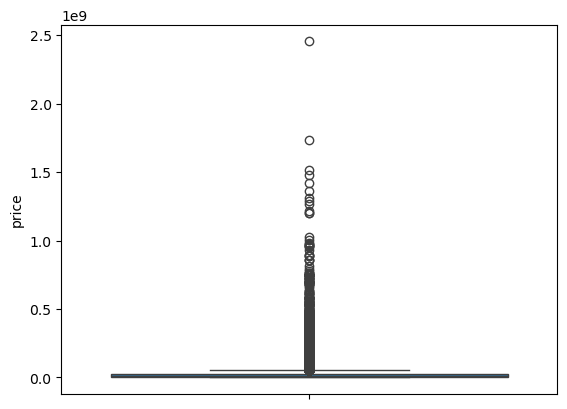

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data.price)
plt.show()

In [24]:
Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data.price[(data.price < lower_bound) | (data.price > upper_bound)]

In [25]:
outliers.describe()

count    3.340000e+03
mean     1.690196e+08
std      1.590761e+08
min      5.150000e+07
25%      7.400000e+07
50%      1.187878e+08
75%      2.000000e+08
max      2.455020e+09
Name: price, dtype: float64

In [26]:
data = data.drop(outliers.index)

In [27]:
data.describe()

,price,type,min_to_metro,region,n_rooms,area,floor,n_floors,cosmetic_renovation,designer_renovation,euro_style_renovation,no_renovation,station_encoded,l+k_area
count,1.933600e+04,19336.000000,19336.000000,19336.000000,19336.000000,19336.000000,19336.000000,19336.000000,19336.000000,19336.000000,19336.000000,19336.000000,1.933600e+04,19336.000000
mean,1.316517e+07,0.492553,12.179613,0.660685,1.680182,51.213727,8.969228,16.272962,0.657892,0.065732,0.165494,0.110881,1.941928e+07,38.617594
std,9.854403e+06,0.499957,6.046305,0.473489,1.218856,23.950105,6.738189,8.144021,0.474428,0.247820,0.371636,0.313993,2.683221e+07,16.609086
min,1.150000e+06,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.200000e+06,6.000000
25%,6.594260e+06,0.000000,8.000000,0.000000,1.000000,35.500000,4.000000,11.000000,0.000000,0.000000,0.000000,0.000000,7.827238e+06,27.000000
50%,9.946316e+06,0.000000,12.000000,1.000000,2.000000,46.170000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,1.000128e+07,35.400000
75%,1.583539e+07,1.000000,16.000000,1.000000,2.000000,63.320000,13.000000,20.000000,1.000000,0.000000,0.000000,0.000000,1.745211e+07,46.625000
max,5.139250e+07,1.000000,60.000000,1.000000,7.000000,297.000000,77.000000,97.000000,1.000000,1.000000,1.000000,1.000000,3.071280e+08,203.800000


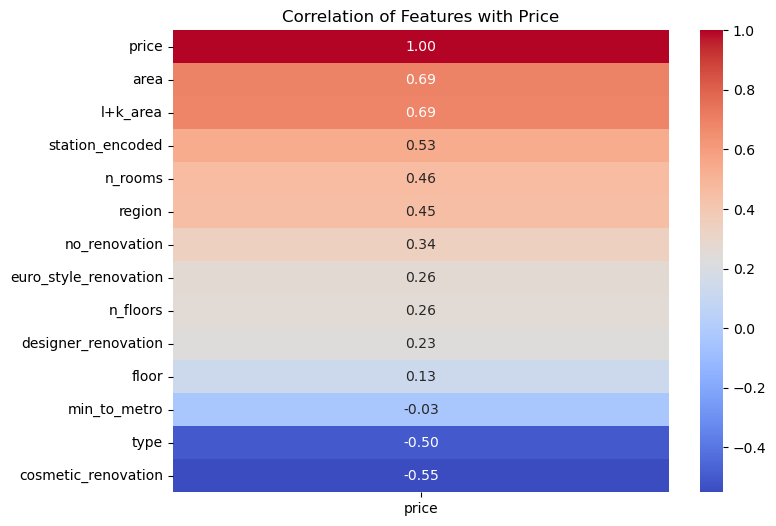

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = data.corr()
corr_price = corr_matrix[['price']].sort_values(by='price', ascending=False)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_price, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Correlation of Features with Price')
plt.show()

In [29]:
data['relative_floor'] = data['floor'] / data['n_floors']
data.drop(columns=['l+k_area'], inplace=True)

### 1.2 Feature scaling

In [30]:
data.head()

,price,type,min_to_metro,region,n_rooms,area,floor,n_floors,cosmetic_renovation,designer_renovation,euro_style_renovation,no_renovation,station_encoded,relative_floor
0,6300000.0,0,6.0,0,1.0,30.6,25.0,25,1.0,0.0,0.0,0.0,1.130259e+07,1.000000
1,9000000.0,0,2.0,0,1.0,49.2,6.0,15,0.0,0.0,1.0,0.0,9.296400e+06,0.400000
2,11090000.0,0,14.0,0,1.0,44.7,10.0,25,1.0,0.0,0.0,0.0,1.599760e+07,0.400000
3,8300000.0,0,8.0,0,1.0,35.1,12.0,33,0.0,0.0,1.0,0.0,1.745211e+07,0.363636
4,6450000.0,0,6.0,0,1.0,37.7,5.0,5,0.0,0.0,0.0,1.0,1.130259e+07,1.000000


In [31]:
from sklearn.preprocessing import StandardScaler

features_to_scale = ['n_rooms', 'area', 'n_floors', 'floor', 'station_encoded', 'min_to_metro']

scaler = StandardScaler()
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

In [32]:
data.sample(10)

,price,type,min_to_metro,region,n_rooms,area,floor,n_floors,cosmetic_renovation,designer_renovation,euro_style_renovation,no_renovation,station_encoded,relative_floor
5338,12500000.0,0,1.458844,1,-0.558064,-0.426470,-0.589080,0.703238,1.0,0.0,0.0,0.0,-0.359771,0.227273
19498,3244495.0,1,0.135688,0,-1.378527,-0.985563,1.043449,0.457653,1.0,0.0,0.0,0.0,-0.493320,0.800000
22657,5518272.0,1,0.301082,0,0.262399,-0.658207,0.746625,-0.279103,1.0,0.0,0.0,0.0,-0.494291,1.000000
17252,8486880.0,1,0.135688,0,1.082862,0.948508,-0.143845,-0.279103,1.0,0.0,0.0,0.0,-0.494291,0.571429
15175,7075740.0,1,-0.856680,0,-0.558064,-0.647769,-0.143845,0.089275,1.0,0.0,0.0,0.0,-0.471367,0.470588
11194,24000000.0,0,0.797266,1,1.903325,1.953540,-0.737491,-0.524688,1.0,0.0,0.0,0.0,-0.141063,0.333333
13199,4090000.0,1,0.135688,0,-1.378527,-0.839840,-1.034315,-0.156310,1.0,0.0,0.0,0.0,-0.385082,0.133333
16544,11049400.0,1,0.135688,1,0.262399,0.145568,1.785507,-0.647481,1.0,0.0,0.0,0.0,-0.373050,1.909091
7752,12000000.0,0,0.631871,1,1.082862,0.057883,-0.143845,-0.893066,1.0,0.0,0.0,0.0,-0.243321,0.888889
18367,9259624.0,1,-0.856680,0,1.082862,0.396095,-0.737491,-0.279103,1.0,0.0,0.0,0.0,-0.392514,0.285714


## 2. Building model

### 2.1 Polynomial regression

In [33]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['price'])
y = data['price']

X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.4, random_state=42)
X_train_cv, X_test, y_train_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42)

In [34]:
del y_
del X_

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import root_mean_squared_error

results_cv = {}
results_train = {}
degree = 5

for i in range(1, degree):    
    poly = PolynomialFeatures(degree=i, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_cv_poly = poly.transform(X_train_cv)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_cv_pred = model.predict(X_cv_poly)
    y_train_pred = model.predict(X_train_poly)
    mse_cv = root_mean_squared_error(y_train_cv, y_cv_pred)
    mse_train = root_mean_squared_error(y_train, y_train_pred)

    results_cv[i] = mse_cv
    results_train[i] = mse_train
    print(f"finished training degree {i}")


print("results cv: \n", results_cv, "\n", "results train: \n", results_train)

finished training degree 1
finished training degree 2
finished training degree 3
finished training degree 4
results cv: 
 {1: 4000230.150998719, 2: 3140297.155533183, 3: 3156167.836541011, 4: 6758792.395410132} 
 results train: 
 {1: 4163533.9394663596, 2: 3264821.7855371623, 3: 2862354.1162990015, 4: 2466843.659375599}


In [36]:
data.price.describe()

count    1.933600e+04
mean     1.316517e+07
std      9.854403e+06
min      1.150000e+06
25%      6.594260e+06
50%      9.946316e+06
75%      1.583539e+07
max      5.139250e+07
Name: price, dtype: float64

### 2.2 Random Forest Regressor

In [37]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

rf_rmse = root_mean_squared_error(y_test, rf_y_pred)

print(f"{rf_rmse: .0f}")

 2577710


In [38]:
df.iloc[18484]

Price                 11200000.0
Apartment type      New building
Metro station           Царицыно
Minutes to metro             4.0
Region                    Moscow
Number of rooms              2.0
Area                       64.94
Living area                 33.9
Kitchen area                11.4
Floor                        8.0
Number of floors              13
Renovation              Cosmetic
Name: 18484, dtype: object

In [39]:
X_test.loc[18484]

type                     1.000000
min_to_metro            -1.352863
region                   1.000000
n_rooms                  0.262399
area                     0.573134
floor                   -0.143845
n_floors                -0.401896
cosmetic_renovation      1.000000
designer_renovation      0.000000
euro_style_renovation    0.000000
no_renovation            0.000000
station_encoded         -0.271098
relative_floor           0.615385
Name: 18484, dtype: float64

### 2.3 Ridge, Lasso and Decision Tree Regressor

In [40]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42),
}

param_grids = {
    "LinearRegression": {
        "poly__degree": [1, 2, 3],  # Polynomial degrees
    },
    "Ridge": {
        "poly__degree": [1, 2, 3],  # Polynomial degrees
        "model__alpha": [0.01, 0.1, 1, 10, 100],  # Regularization strength
    },
    "Lasso": {
        "poly__degree": [1, 2, 3],  # Polynomial degrees
        "model__alpha": [0.01, 0.1, 1, 10, 100],  # Regularization strength
    },
    "DecisionTreeRegressor": {
        "model__max_depth": [None, 5, 10, 20],
        "model__min_samples_split": [2, 5, 10],
        "model__min_samples_leaf": [1, 2, 4],
    }
}

In [41]:
from sklearn.pipeline import Pipeline

best_models = {}

for model_name, model in models.items():
    print(f"Performing GridSearch for {model_name}...")
    
    # Define pipeline
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(include_bias=False)),  # Polynomial transformation
        ('scaler', StandardScaler()),  # Standard scaling
        ('model', model)  # The model
    ])
    
    # Create GridSearchCV
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grids[model_name],
        scoring='neg_mean_squared_error',  # Use RMSE as scoring metric
        cv=5,  # 5-fold cross-validation
        n_jobs=-1
    )
    
    # Fit the grid search
    grid_search.fit(X_train, y_train)
    
    # Save Best Results
    best_models[model_name] = {
        "best_estimator": grid_search.best_estimator_,
        "best_params": grid_search.best_params_,
        "best_score": -grid_search.best_score_  # Convert negative RMSE to positive
    }
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best RMSE for {model_name}: {np.sqrt(-grid_search.best_score_)}", '\n')

Performing GridSearch for LinearRegression...
Best parameters for LinearRegression: {'poly__degree': 1}
Best RMSE for LinearRegression: 4175267.0492843864 

Performing GridSearch for Ridge...
Best parameters for Ridge: {'model__alpha': 100, 'poly__degree': 3}
Best RMSE for Ridge: 3152641.610209141 

Performing GridSearch for Lasso...


C:\Users\LEGION\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.106e+16, tolerance: 1.115e+14
  model = cd_fast.enet_coordinate_descent(


Best parameters for Lasso: {'model__alpha': 100, 'poly__degree': 3}
Best RMSE for Lasso: 3213299.6370745553 

Performing GridSearch for DecisionTreeRegressor...
Best parameters for DecisionTreeRegressor: {'model__max_depth': 10, 'model__min_samples_leaf': 4, 'model__min_samples_split': 10}
Best RMSE for DecisionTreeRegressor: 3319443.577897992 



### 2.4 Neural Network

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(128, activation='relu', name='l1'),
    Dense(64, activation='relu', name='l2'),
    Dense(1, activation='relu', name='o')
])

In [44]:
model.compile(
    loss='mean_squared_error',
    optimizer=Adam(0.001),
)

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [45]:
history = model.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=100, 
    batch_size=32, 
    callbacks=[early_stop]
)

Epoch 1/100
484/484 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 269756762423296.0000 - val_loss: 268711793524736.0000
Epoch 2/100
484/484 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 269063511080960.0000 - val_loss: 264852228538368.0000
Epoch 3/100
484/484 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 269399642603520.0000 - val_loss: 255681265401856.0000
Epoch 4/100
484/484 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 247445615280128.0000 - val_loss: 240397573947392.0000
Epoch 5/100
484/484 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 239402685038592.0000 - val_loss: 219519687589888.0000
Epoch 6/100
484/484 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 214807168942080.0000 - val_loss: 194213740281856.0000
Epoch 7/100
484/484 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 191076870651904.0000 - val_loss: 166140609298432.0000
Epoch 8/100
484/484 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 160692074184704.0000 - val_loss: 137329792516096.0000
Epoch 9/100
484/484 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 131206117064704.000

In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ l1 (Dense)                           │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ l2 (Dense)                           │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ o (Dense)                            │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,341 (118.52 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,228 (79.02 KB)

In [47]:
test_loss = model.evaluate(X_test, y_test)
test_rmse = np.sqrt(test_loss)
print(f"Test RMSE: {test_rmse}")

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15106421293056.0000  
Test RMSE: 3758164.1233091457


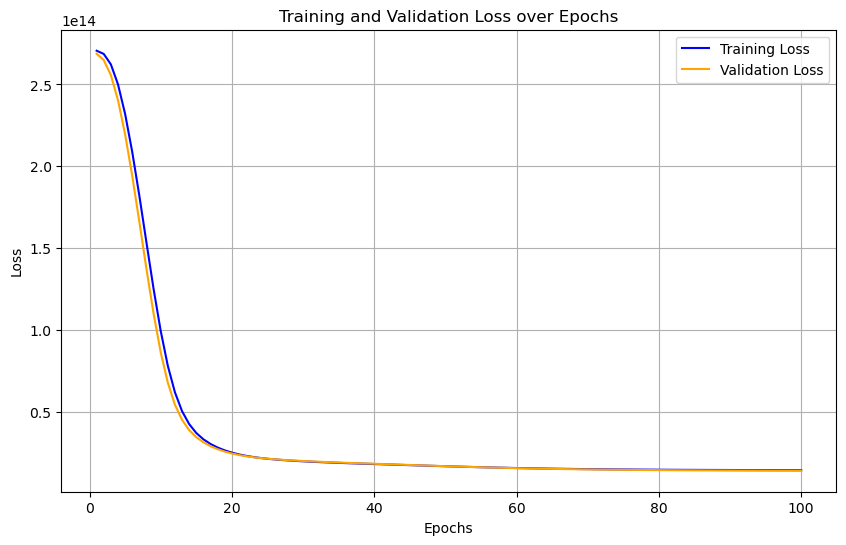

In [48]:
def plot_loss(history):
    # Get training and validation loss
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Get the number of epochs
    epochs = range(1, len(train_loss) + 1)
    
    # Plot the loss curves
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_loss, label='Training Loss', color='blue')
    plt.plot(epochs, val_loss, label='Validation Loss', color='orange')
    plt.title('Training and Validation Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to plot loss
plot_loss(history)

## 3. Exporting model

In [49]:
rf_model

RandomForestRegressor(random_state=42)

In [54]:
import pickle as pkl

with open('rf_model.pkl', 'wb') as f:
    pkl.dump(rf_model, f)

with open('scaler.pkl', 'wb') as f:
    pkl.dump(scaler, f)
    
with open('station_mapping.pkl', 'wb') as f:
    pkl.dump(target_means, f)

with open('onehot_encoder.pkl', 'wb') as f:
    pkl.dump(encoder, f)